#Q1:Import required libraries and read the dataset.

In [1]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline
# Numerical libraries
import numpy as np
# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression
# to handle data in form of rows and columns
import pandas as pd 
# importing plotting libraries
import matplotlib.pyplot as plt 
#importing seaborn for statistical plots
import seaborn as sns
# Importing Logistic Libraries 
from sklearn.linear_model import LogisticRegression
#Sklearn package's data splitting function which is based on random function
from sklearn.model_selection import train_test_split
# calculate accuracy measures and confusion matrix
from sklearn import metrics
# To scale the dimensions we need scale function which is part of sckikit preprocessing libraries
from sklearn import preprocessing

#Q2:Check shape and info of the dataset.

In [2]:
# reading the CSV file into pandas dataframe
bld_df_org = pd.read_csv("Bank_Personal_Loan_Modelling-1.csv")
bld_df = bld_df_org
bld_df

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.60,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.50,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.00,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.70,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.00,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.40,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.50,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.30,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.60,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.90,3,0,1,0,0,0,0


In [3]:
# drop the ID, ZIPCODE column as they may not be useful for the model
bld_df = bld_df.drop('ID', axis=1)
bld_df = bld_df.drop('ZIP Code', axis=1)
bld_df

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.60,1,0,0,1,0,0,0
1,45,19,34,3,1.50,1,0,0,1,0,0,0
2,39,15,11,1,1.00,1,0,0,0,0,0,0
3,35,9,100,1,2.70,2,0,0,0,0,0,0
4,35,8,45,4,1.00,2,0,0,0,0,0,1
5,37,13,29,4,0.40,2,155,0,0,0,1,0
6,53,27,72,2,1.50,2,0,0,0,0,1,0
7,50,24,22,1,0.30,3,0,0,0,0,0,1
8,35,10,81,3,0.60,2,104,0,0,0,1,0
9,34,9,180,1,8.90,3,0,1,0,0,0,0


In [ ]:
bld_df.shape

In [ ]:
bld_df.size

In [ ]:
bld_df.isnull().sum()

In [ ]:
bld_df.dtypes

In [ ]:
bld_df.groupby('Personal Loan').count()


#Q3:Use describe function to get summary of data and mention your findings

In [4]:
#Describing the data
bld_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0
CD Account,5000.0,0.060400,0.238250,0.0,0.0,0.0,0.0,1.0


#Findings based on the summary:

#1. There are no Null Values in the data set.

#2. All Attributes are of Data Type Int or Float No String Values

#4. Family & Education are cardinal variables and columns needs to be splinted

#5. ID, ZIP Code columns are not required for the Analysis hence they were dropped from the Data Frame.

#6. Income and Mortgage are having More Mean than Median so Mean falls right of Median shows un even distribution # and having skewness towards right side.

#7 Rest of the columns are having almost normal distribution.

#Q4: Study the data distribution in each attribute, share your findings

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 360x216 with 0 Axes>

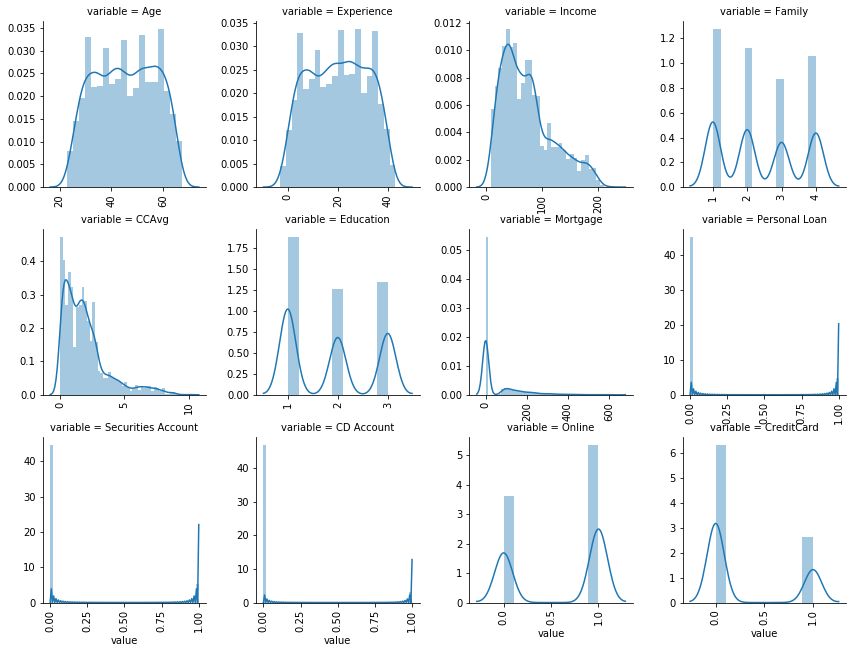

In [5]:
#getting the Data Distibution for each of the attribute
numerical_features = ['Age','Experience','Income','Family','CCAvg','Education','Mortgage','Personal Loan','Securities Account','CD Account','Online','CreditCard']
nd = pd.melt(bld_df, value_vars = numerical_features)
plt.figure(figsize = (5,3))
plot = sns.FacetGrid (nd, col='variable', col_wrap=4, sharex=False, sharey = False)
plot = plot.map(sns.distplot, 'value')
for ax in plot.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(90)

#Findings on Data Distribution of each Attribute:

#Attribute - Type 
#1. Continuous Variables - Age, Experience, Income.
#2. Categorical/Discrete CCAvg, Education, Mortgage, Personal Loan, Securities Account, CD Account, Online and CreditCard.
#3. Age ,Experience, Income are having normal distribution.
#4. CC Avg and Mortgage are having Left Skewness may be having outliers.
#4 Categorical Variables are to be split into different columns.

#Q5: Get the target column distribution and mention your comments.

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 360x216 with 0 Axes>

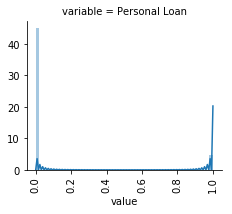

In [6]:
numerical_features = ['Personal Loan']
nd = pd.melt(bld_df, value_vars = numerical_features)
plt.figure(figsize = (5,3))
plot = sns.FacetGrid (nd, col='variable', col_wrap=4, sharex=False, sharey = False)
plot = plot.map(sns.distplot, 'value')
for ax in plot.axes.flat:
        for label in ax.get_xticklabels():
            label.set_rotation(90)

#Findings on Data Distribution of Target Column:
#Personal Loan is the target column and Its a discrete variable.
#Very less people are opted for Personal loan and sample will be enough to predict the target variable
#Only 480 were took Personal loan 4520 were not opted for Personal Loan.

In [7]:
# Split Categorical variables
bld_df = pd.get_dummies(bld_df, columns=['Family'])
bld_df = pd.get_dummies(bld_df, columns=['Education'])
bld_df

,Age,Experience,Income,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Family_1,Family_2,Family_3,Family_4,Education_1,Education_2,Education_3
0,25,1,49,1.60,0,0,1,0,0,0,0,0,0,1,1,0,0
1,45,19,34,1.50,0,0,1,0,0,0,0,0,1,0,1,0,0
2,39,15,11,1.00,0,0,0,0,0,0,1,0,0,0,1,0,0
3,35,9,100,2.70,0,0,0,0,0,0,1,0,0,0,0,1,0
4,35,8,45,1.00,0,0,0,0,0,1,0,0,0,1,0,1,0
5,37,13,29,0.40,155,0,0,0,1,0,0,0,0,1,0,1,0
6,53,27,72,1.50,0,0,0,0,1,0,0,1,0,0,0,1,0
7,50,24,22,0.30,0,0,0,0,0,1,1,0,0,0,0,0,1
8,35,10,81,0.60,104,0,0,0,1,0,0,0,1,0,0,1,0
9,34,9,180,8.90,0,1,0,0,0,0,1,0,0,0,0,0,1


In [ ]:
#Q6:Do Bivariate analysis and mention your inferences

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


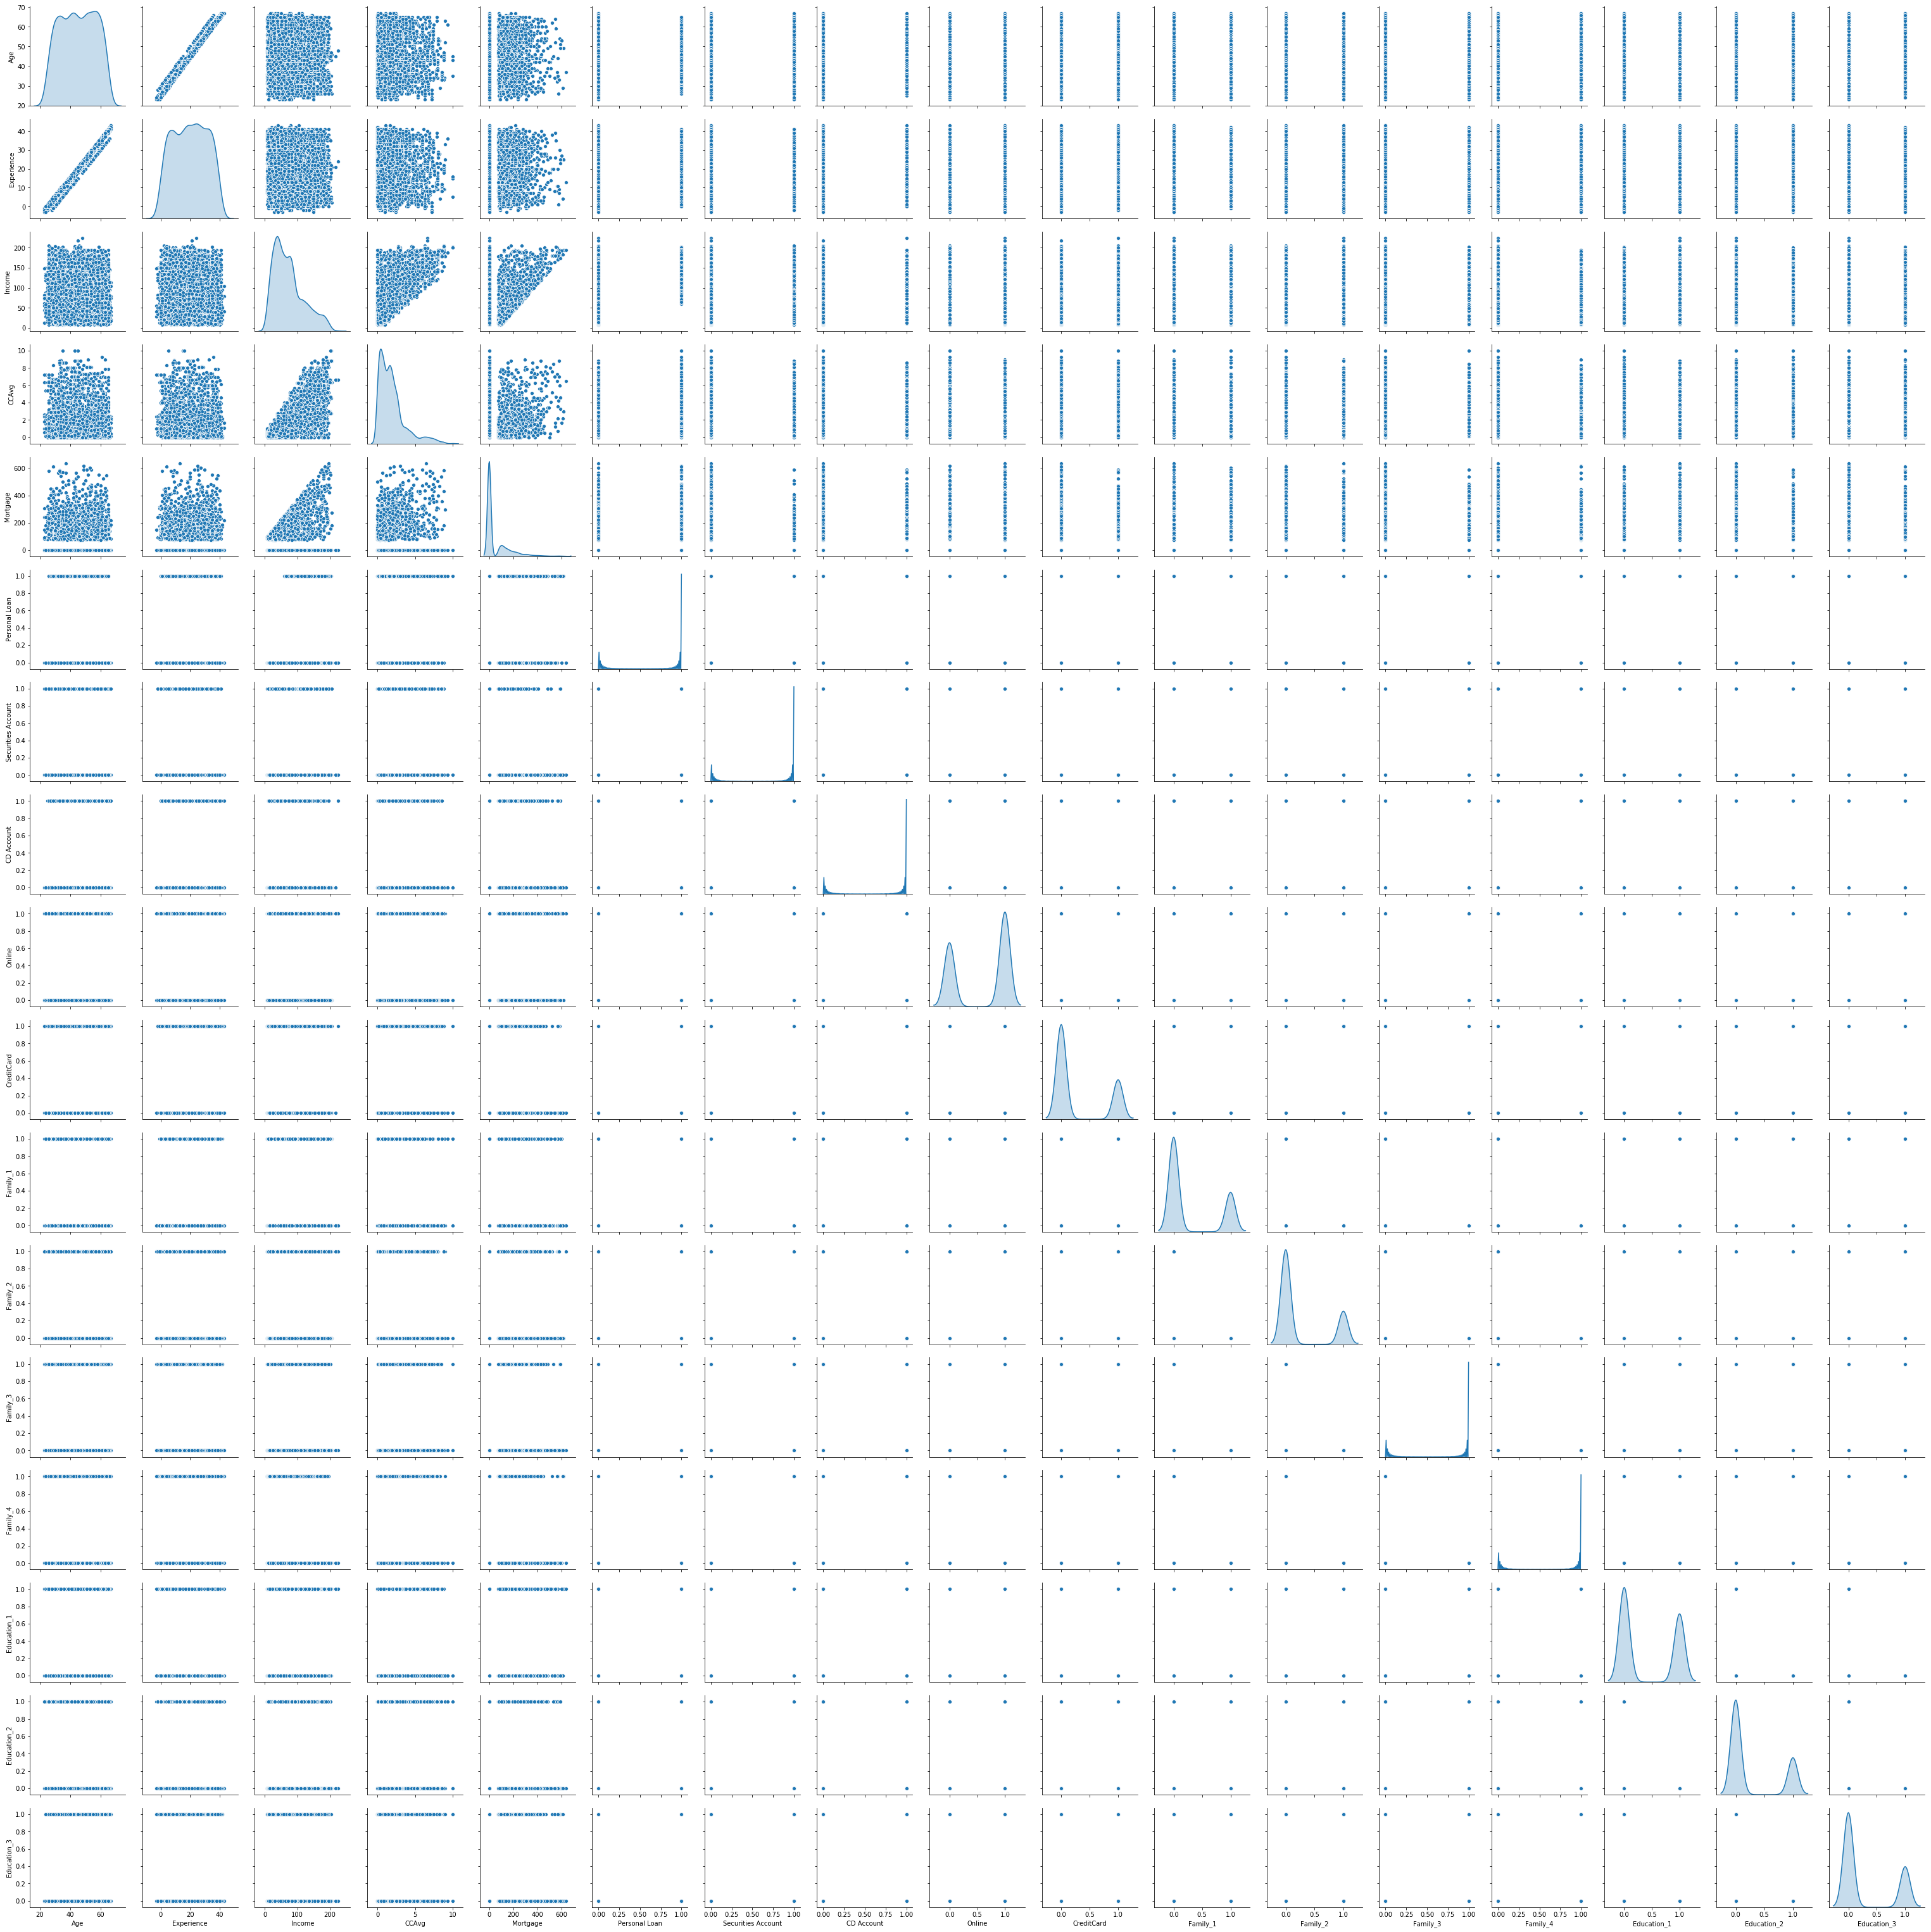

In [8]:
# The Bivariate/correlation analysis among the different dimensions and also each dimension with the dependent dimension
# This is done using scatter matrix function which creates a dashboard reflecting useful information about the dimensions
# The result can be stored as a .png file and opened in say, paint to get a larger view
bld_df_attr = bld_df.iloc[:, 0:17]
sns.pairplot(bld_df_attr, diag_kind='kde') # To plot density curve instead of histogram

#Inference on Bivariate Analysis:
#1.In Principle Diagnol of the above graph shows two peaks/curves shows better two have 2 differnet models.
#2. Relationship:
Personal Loan	-	Target variable
Relation with other Attributes:		
Age	-	Linear Relation
Experience	-	Linear Relation
Income	-	Linear Relation
CCAvg	-	Linear Relation
Mortgage	-	Linear Relation
Securities Account	-	Linear Relation
CD Account	-	Independent & No Impact
Online	-	Independent & No Impact
CreditCard	-	Independent & No Impact
Family_1	-	Independent & No Impact
Family_2	-	Independent & No Impact
Family_3	-	Independent & No Impact
Family_4	-	Independent & No Impact
Education_1	-	Independent & No Impact
Education	-	Independent & No Impact
#3. Less Linear nature between Target and other variables.

#Q7:Take absolute values of experience for further analysis.

#1. As the data is not in linear nature the value the final Logistic Regression model to predict the likelihood of a liability customer buying personal loans may not predict properly.
#2. use of Logit method may give much performance of the model.
#3. The below Attributes will have more influence on purchasing home loan:
Age
Experience
Income
CCAvg
Mortgage
#4. Some of the attributes look like they may have an exponential distribution

#Q8: Split the data into training and test set in the ratio of 70:30 respectively

In [10]:
#Splitthe data into X and y as training and test set in 70:30 ratio.
# Copy all the predictor variables into X dataframe. And Target variable 'Personal Loan' to y
X = bld_df.drop('Personal Loan', axis=1)
y = bld_df[['Personal Loan']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=50)

In [11]:
X_train.shape

(3500, 16)

In [12]:
X_test.shape

(1500, 16)

In [13]:
y_train.shape

(3500, 1)

In [14]:
y_test.shape

(1500, 1)

#Q9. Build a Logistic Regression model to predict the likelihood of a liability
#customer buying personal loans

In [15]:
#Logistic Regression Model building
model = LogisticRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
t = list(X_train.columns)
coef_df = pd.DataFrame(model.coef_, columns= t)
coef_df['intercept'] = model.intercept_
print(coef_df)

        Age  Experience    Income     CCAvg  Mortgage  Securities Account  \
0 -0.283858    0.288094  0.061434  0.158077  0.000788           -0.719824   

   CD Account   Online  CreditCard  Family_1  Family_2  Family_3  Family_4  \
0    3.258344 -0.41209   -0.905563 -0.965019 -1.354378  0.716095   0.31058   

   Education_1  Education_2  Education_3  intercept  
0    -3.081262     0.739666     1.048875  -1.292721  


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#Q10. Print the confusion matrix for the model

In [16]:
#Confusion Matrix for the data
print(metrics.confusion_matrix(y_test, y_predict))

[[1349    9]
 [  50   92]]


#True Positives (TP): we correctly predicted that customer don't buying personal loans 1349
#True Negatives (TN): we correctly predicted that customer buying personal loans: 9
#False Positives (FP): we incorrectly predicted that customer don't buying personal loans (Type I error): 50
#False Negatives (FN): we incorrectly predicted that customer buying personal loans (Type II error):92

                    Predicted No	Predicted Yes
"0" Class	1358	1349 (TN)	         9 (FP)
"1" Class	144	      52 (FN)	        92 (TP)
		            1401	           101


Precission:
For Non Personal Loan Class: TP/(TP+FP) = 1349/(1349+9) = 96.28%
For  Personal Loan Class: TP/(TP+FP) = 92/(92+52) = 63.88%
Recall:
For Non Personal Loan Class: TP/(TP+FN) = 1349/(1349+52)=96.22%
For Personal Loan Class: TP/(TP+FN) =  92/(9+92)=91.08%
Accuracy:(TP+TN)/(TP+TN+FP+FN)= 96.06%
F1 Score: 2.(Precission-Recall)/(Precission+Recall)= 35.10%

#Q11.Print model score for both train and test data.

In [20]:
## model_Train_score = model.score(X_train, y_train)
print("Train_Score: ",model_Train_score)
model_Test_score = model.score(X_test, y_test)
print("Test_Score: ", model_Test_score)

Train_Score:  0.962
Test_Score:  0.9606666666666667


#Q12.Print classification report.

In [21]:
print(coef_df)
print("Train_Score: ",model_Train_score)
print("Test_Score: ", model_Test_score)

        Age  Experience    Income     CCAvg  Mortgage  Securities Account  \
0 -0.283858    0.288094  0.061434  0.158077  0.000788           -0.719824   

   CD Account   Online  CreditCard  Family_1  Family_2  Family_3  Family_4  \
0    3.258344 -0.41209   -0.905563 -0.965019 -1.354378  0.716095   0.31058   

   Education_1  Education_2  Education_3  intercept  
0    -3.081262     0.739666     1.048875  -1.292721  
Train_Score:  0.962
Test_Score:  0.9606666666666667


#z=-0.28Age + 0.28Experience + 0.06Income + 0.16CCAvg + 0.01Mortgage - 0.72Securities Account + 3.26CD Account -  0.41Online - 0.91CreditCard - 0.97Family_1 - 1.35Family_2 + 0.72Family_3 + 0.31Family_4 - 3.08Education_1 + 0.72Education_2 + 1.05Education_3 - 1.30
#Pridction Probability =  1/(1+e^-z)
#Train_Score:  96.2%
#Test_Score: 96.07%
#Accuracy is 9.06%
#Precission for Laon Calss is predicting with less accuracy